In [2]:
from matplotlib import pyplot as plt
import numpy as np
import qutip as qt

In [33]:
def gaussian_ramp(initial_time,t0, amplitude):
    """
    Creates a time-dependent function using a Gaussian function that starts near zero,
    peaks at 'amplitude' at time 't0', and remains constant at 'amplitude' for t > t0.

    Args:
    t0 (float): The time at which the function peaks at the amplitude.
    amplitude (float): The maximum amplitude of the Gaussian peak.

    Returns:
    function: A function of time 't' that implements the desired behavior.
    """
    # Define the standard deviation such that the peak is sharp at t0
    sigma = t0 / 3  # Adjust sigma to make the function start close to zero at t=0

    # Define the function using a closure to encapsulate the parameters
    def time_dependent_function(t):
        t00 = t0-initial_time
        if t<=initial_time:
            return 0
        if t <= t0:
#             t = t-initial_time
            
            # Gaussian function centered at t0
            return amplitude * np.exp(-((t - t0)**2) / (2 * sigma**2)) - amplitude * np.exp(-((initial_time - t0)**2) / (2 * sigma**2))
        else:
            # Return constant amplitude for t > t0
            return amplitude- amplitude * np.exp(-((initial_time - t0)**2) / (2 * sigma**2))

    return time_dependent_function
tlist = np.linspace(0, 250, 100000)  # Cover ten periods
func = gaussian_ramp(0,100, 0.003* 2 * np.pi)

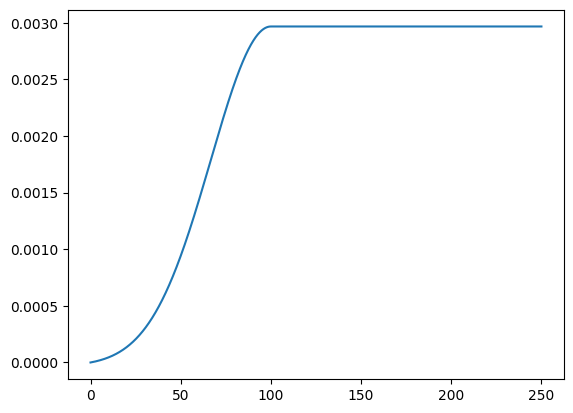

In [34]:
plt.plot(tlist,[func(t)/2/np.pi for t in tlist])


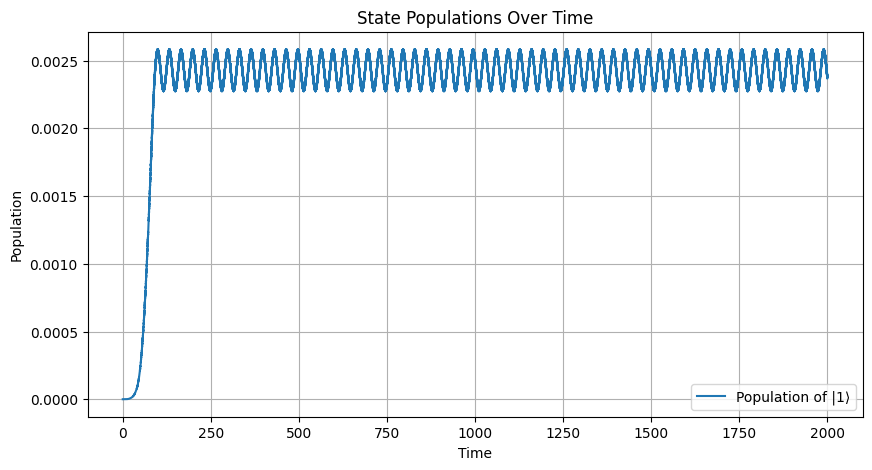

In [37]:
omega = 6.03 * 2 * np.pi
omega1 = 6*2*np.pi
T = (2*np.pi)/omega
args = {'w': omega,'w1':omega1}
tlist = np.linspace(0, 2000, 100000)  # Cover ten periods
psi0 = qt.basis(2, 0)
H0 = omega/2*qt.sigmaz()
Hc = qt.sigmax()
H = [H0, [Hc, lambda t, args: func(t)*np.cos(args['w1']*t)]]
#     options = Options(nsteps=100000)  # Increasing nsteps to 10000, adjust as needed
result = qt.sesolve(H, psi0, tlist, args=args)
pop0 = [abs(state[0, 0])**2 for state in result.states]
pop1 = [abs(state[1, 0])**2 for state in result.states]
plt.figure(figsize=(10, 5))
# plt.plot(tlist, pop0, label="Population of |0⟩")
plt.plot(tlist, pop1, label="Population of |1⟩")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("State Populations Over Time")
plt.legend()
plt.grid(True)
plt.show()

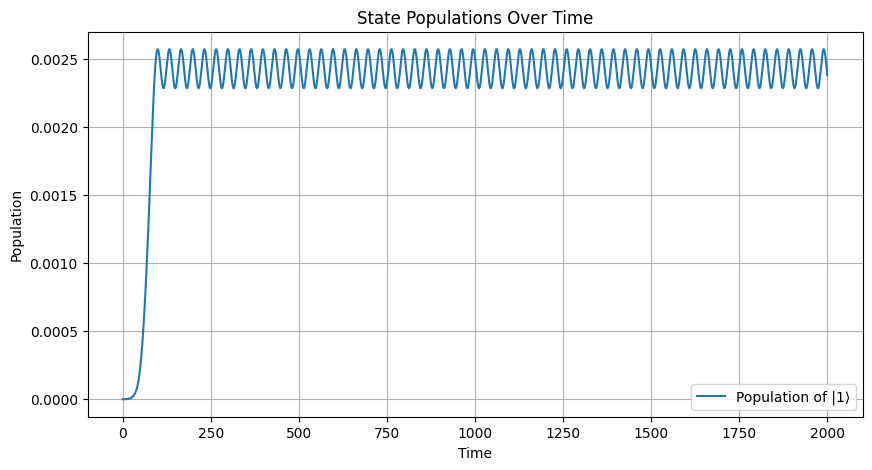

In [41]:
omega = 6.03 * 2 * np.pi
omega1 = 6*2*np.pi
T = (2*np.pi)/omega
args = {'w': omega,'w1':omega1}
tlist = np.linspace(0, 2000, 100000)  # Cover ten periods
psi0 = qt.basis(2, 0)
H0 = (omega-omega1)/2*qt.sigmaz()
Hc = qt.sigmax()/2
H = [H0, [Hc, lambda t, args: func(t)]]
#     options = Options(nsteps=100000)  # Increasing nsteps to 10000, adjust as needed
result = qt.sesolve(H, psi0, tlist, args=args)
pop0 = [abs(state[0, 0])**2 for state in result.states]
pop1 = [abs(state[1, 0])**2 for state in result.states]
plt.figure(figsize=(10, 5))
# plt.plot(tlist, pop0, label="Population of |0⟩")
plt.plot(tlist, pop1, label="Population of |1⟩")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("State Populations Over Time")
plt.legend()
plt.grid(True)
plt.show()